<a href="https://colab.research.google.com/github/krisMG21/PL1_IA/blob/main/Practica_1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def process_cm(cm):
  # Matriz en porcentajes
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

  # Matriz en porcentajes
  cm[:, 0] /= cm[:, 0].astype("float").sum()
  cm[:, 1] /= cm[:, 1].astype("float").sum()
  cm *= 100
  return cm

def print_cm(cm):
  # Visualizar la matriz de confusión
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt="f", cmap="Blues")
  plt.title("Matriz de Confusión")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

def print_stats(cm):
  TP = cm[1, 1]
  FP = cm[0, 1]
  TN = cm[0, 0]
  FN = cm[1, 0]

  # Imprimir métricas adicionales
  exactitud = (TP + TN) / (TP + TN + FP + FN)
  precision = TP / (TP + FP)
  sensibilidad = TP / (TP + FN) #recuerdo / recuperación
  especificidad = TN / (TN + FP)

  print()
  print(f"Exactitud: {exactitud:.2f}")
  print(f"Precisión: {precision:.2f}")
  print(f"Sensibilidad: {sensibilidad:.2f}")
  print(f"Especificidad: {especificidad:.2f}\n")

  print(f"Verdaderos Positivos: {cm[1,1]}")
  print(f"Falsos Positivos: {cm[0,1]}")
  print(f"Verdaderos Negativos: {cm[0,0]}")
  print(f"Falsos Negativos: {cm[1,0]}")

# Introducción

El trabajo consiste en, basándonos en los conceptos de Aprendizaje Analógico, crear un modelo capaz de determinar si el solicitante de un crédito debe recibirlo o no basándono en decisiones anteriores.

Se emplearán 20
variables predictivas y una variable de respuesta cuyo valor es 1(devuelto) y 0(no devuelto).

La base de datos consta de 700 clientes que sí
devolvieron el crédito y 300 que no lo hicieron.

## Leer y normalizar

In [ ]:
# Cargar los datos
data = pd.read_csv("data/Datos_credito.csv", sep=",")

# Separar características y etiquetas
X = data.iloc[:, 1:]  # Todas las columnas excepto la primera
y = data.iloc[:, 0]  # Primera columna (Creditability)

# Definir conjuntos de entrenamiento y prueba (ajustando índices)
X_train = pd.concat([X.iloc[:350], X.iloc[700:850]])
y_train = pd.concat([y.iloc[:350], y.iloc[700:850]])
X_test = pd.concat([X.iloc[350:700], X.iloc[850:]])
y_test = pd.concat([y.iloc[350:700], y.iloc[850:]])

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
len(X_train)

500

# Clasificador binario, knn de 5

A partir de los datos leídos anteriormente, realizamos una clasificación por K vecinos próximos

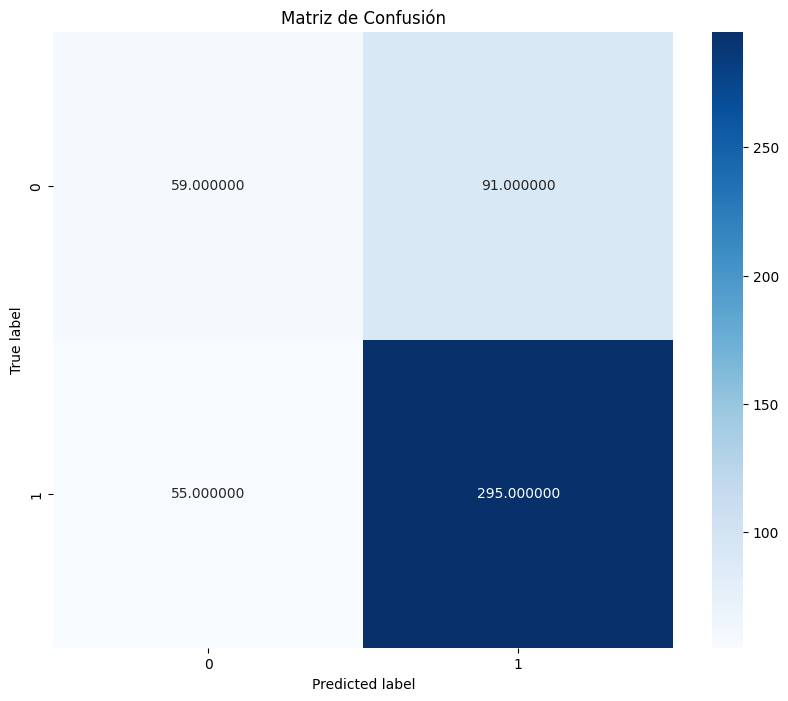


Exactitud: 0.71
Precisión: 0.76
Sensibilidad: 0.84
Especificidad: 0.39

Verdaderos Positivos: 295
Falsos Positivos: 91
Verdaderos Negativos: 59
Falsos Negativos: 55


In [ ]:
def cm_knn_model(k: int):
  # Implementar el clasificador k-NN
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)

  # Realizar predicciones
  y_pred = knn.predict(X_test_scaled)

  # Generar matriz de confusión
  return confusion_matrix(y_test, y_pred)

cm = cm_knn_model(5)
print_cm(cm)
print_stats(cm)

# Preguntas

## 1. Sobre el conjunto de entrenamiento, empleando la matriz de confusión la exactitud de un modelo lineal ¿es superior o inferior al 50%?:

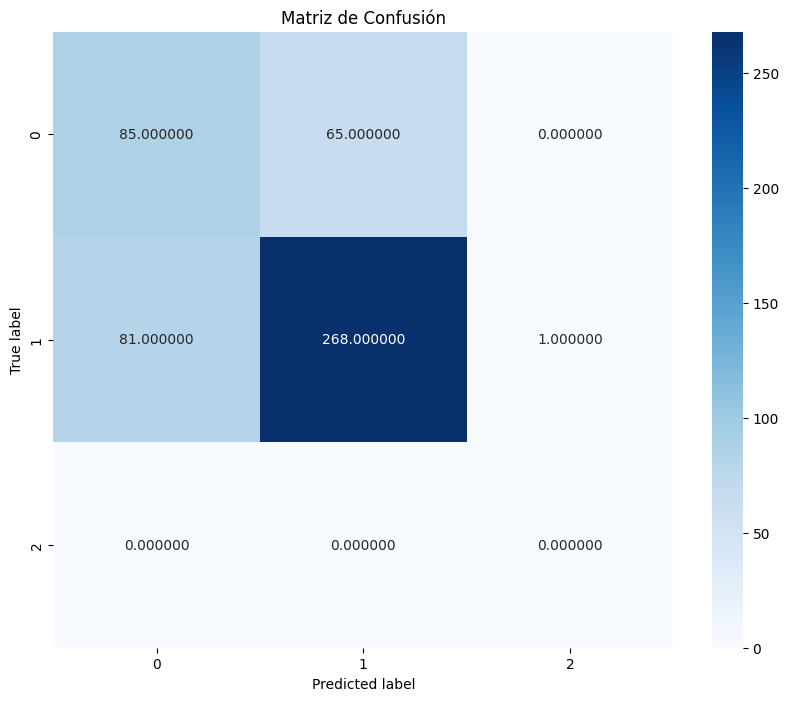


Exactitud: 0.71
Precisión: 0.80
Sensibilidad: 0.77
Especificidad: 0.57

Verdaderos Positivos: 268
Falsos Positivos: 65
Verdaderos Negativos: 85
Falsos Negativos: 81


In [ ]:
from sklearn.linear_model import LinearRegression

def cm_linear_regression():
  lr = LinearRegression()
  lr.fit(X_train_scaled, y_train)

  # Realizar predicciones y redondear
  y_pred = lr.predict(X_test_scaled)
  y_pred_rounded = np.round(y_pred) # Redondear predicciones

  # Generar matriz de confusión
  return confusion_matrix(y_test, y_pred_rounded) # Usar predicciones redondeadas

cm = cm_linear_regression()
print_cm(cm)
print_stats(cm)

## 2. Sobre el mismo conjunto, cual es la exactitud de un modelo de regresión logística?

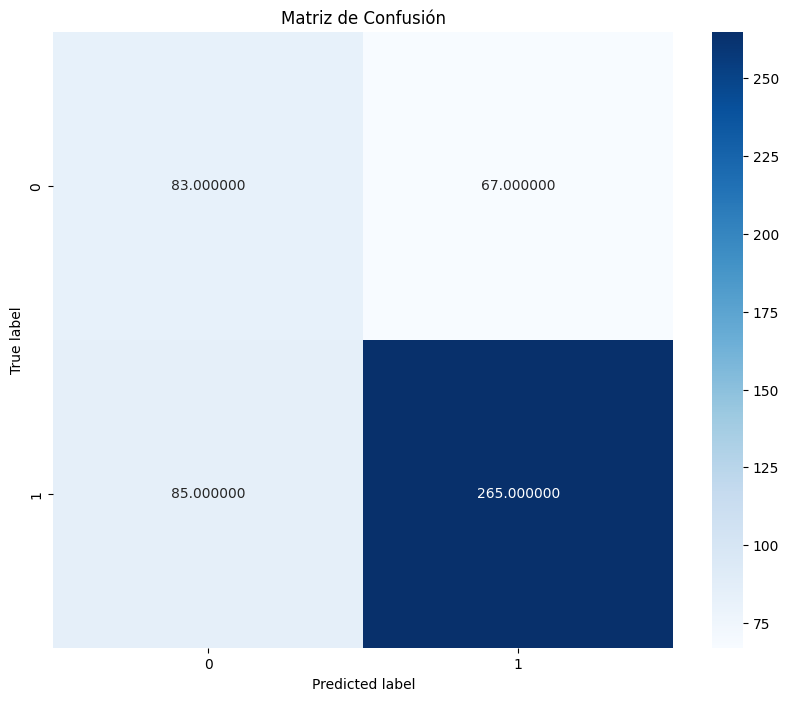


Exactitud: 0.70
Precisión: 0.80
Sensibilidad: 0.76
Especificidad: 0.55

Verdaderos Positivos: 265
Falsos Positivos: 67
Verdaderos Negativos: 83
Falsos Negativos: 85


In [ ]:
from sklearn.linear_model import LogisticRegression

def cm_logistic_regression():
  lr = LogisticRegression()
  lr.fit(X_train_scaled, y_train)

  # Realizar predicciones
  y_pred = lr.predict(X_test_scaled)

  # Generar matriz de confusión
  return confusion_matrix(y_test, y_pred)

cm = cm_logistic_regression()
print_cm(cm)
print_stats(cm)

## 3. Sobre el mismo conjuntos de datos, empleando k-nn (10 vecinos) ¿cual es
la exactitud del modelo?

La exactitud es de un 65%, no varía demasiado con un número de vecinos variable, pero cuanto más aumentan los vecinos empleados, aumentan tanto los verdaderos negativos como falsos positivos, aumentando muy ligeramente la exactitud.

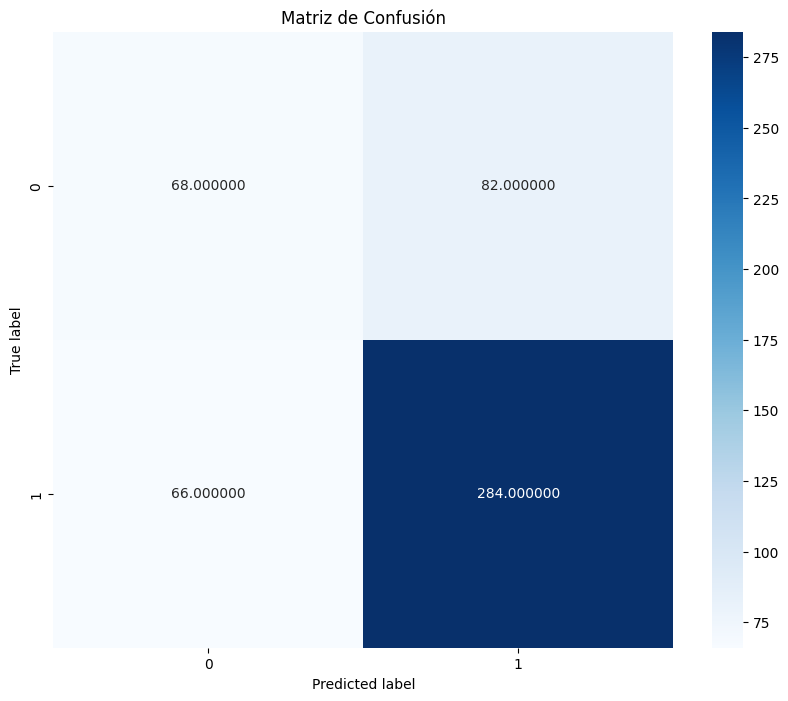


Exactitud: 0.70
Precisión: 0.78
Sensibilidad: 0.81
Especificidad: 0.45

Verdaderos Positivos: 284
Falsos Positivos: 82
Verdaderos Negativos: 68
Falsos Negativos: 66


In [ ]:
cm = cm_knn_model(10)
print_cm(cm)
print_stats(cm)

## 4. Misma pregunta para un árbol, permitiendo la máxima expansión por defecto.

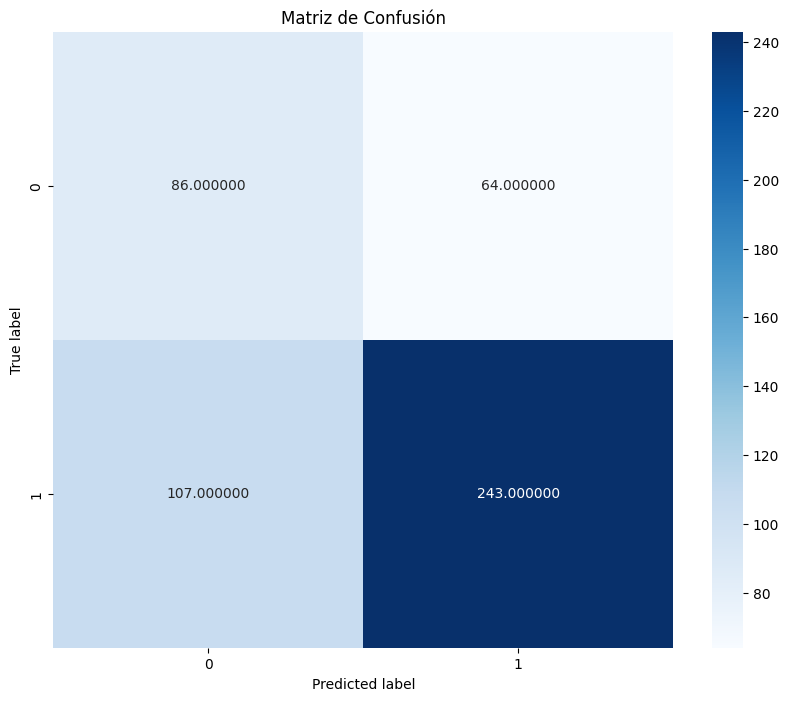


Exactitud: 0.66
Precisión: 0.79
Sensibilidad: 0.69
Especificidad: 0.57

Verdaderos Positivos: 243
Falsos Positivos: 64
Verdaderos Negativos: 86
Falsos Negativos: 107


In [ ]:
from sklearn.tree import DecisionTreeClassifier

def cm_tree_model():
  # Implementar el modelo de árbol de decisión
  tree_model = DecisionTreeClassifier()
  tree_model.fit(X_train_scaled, y_train)

  # Realizar predicciones
  y_pred_tree = tree_model.predict(X_test_scaled)

  # Matriz confusión
  return confusion_matrix(y_test, y_pred_tree)

cm = cm_tree_model()
print_cm(cm)
print_stats(cm)

## 5. Sobre el conjunto de test, ¿que modelos, en su caso, ofrecen mejor calidad predictiva que sobre el conjunto de entrenamiento?.
Emplee tres medidas
alternativas: exactitud, F1 y coeficiente de Matthews.

In [ ]:
def exactitud(cm):
  TP = cm[1, 1]
  FP = cm[0, 1]
  TN = cm[0, 0]
  FN = cm[1, 0]

  return (TP + TN) / (TP + TN + FP + FN)

def F1_score(cm):
  TP = cm[1, 1]
  FP = cm[0, 1]
  TN = cm[0, 0]
  FN = cm[1, 0]

  precision = TP / (TP + FP)
  sensibilidad = TP / (TP + FN)

  return 2 * (precision * sensibilidad) / (precision + sensibilidad)

def MCC_score(cm):
  TP = cm[1, 1]
  FP = cm[0, 1]
  TN = cm[0, 0]
  FN = cm[1, 0]

  res = (TP * TN - FP * FN)
  res /= np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

  return res

def test_quality(cm):
  print(f"Exactitud: {exactitud(cm)}")
  print(f"F1: {F1_score(cm)}")
  print(f"MCC: {MCC_score(cm)}")

print("KNN de 5:")
cm = cm_knn_model(5)
test_quality(cm)

print("\nKNN de 10:")
cm = cm_knn_model(10)
test_quality(cm)

print("\nModelo lineal:")
cm = cm_logistic_regression()
test_quality(cm)

print("\nRegresión Logística:")
cm = cm_logistic_regression()
test_quality(cm)

print("\nÁrbol de Decisión:")
cm = cm_tree_model()
test_quality(cm)

KNN de 5:
Exactitud: 0.708
F1: 0.8016304347826086
MCC: 0.2579858909938019

KNN de 10:
Exactitud: 0.704
F1: 0.7932960893854749
MCC: 0.2739316457321619

Modelo lineal:
Exactitud: 0.696
F1: 0.7771260997067447
MCC: 0.30122032307174346

Regresión Logística:
Exactitud: 0.696
F1: 0.7771260997067447
MCC: 0.30122032307174346

Árbol de Decisión:
Exactitud: 0.666
F1: 0.746585735963581
MCC: 0.26677853211059255


## 6. Suponga ahora que el coste de conceder un crédito (y que el cliente no lo devuelva)
es el cuatro veces que el coste de no concederlo en el caso de en que un cliente sí lo hubiera devuelto. ¿en términos predictivos, que modelo parece el más adecuado?

Esto quiere decir que priorizamos reducir los falsos negativos, costando estos 4 veces más, veamos que modelo actúa mejor:

In [ ]:
def test_cost(cm):
  TP = cm[1,1]
  FP = cm[0,1]
  TN = cm[0,0]
  FN = cm[1,0]

  return FP + 4*FN

print(f" {test_cost(cm_knn_model(5))} - KNN de 5")
print(f" {test_cost(cm_knn_model(10))} - KNN de 10")
print(f" {test_cost(cm_linear_regression())} - Modelo lineal")
print(f" {test_cost(cm_logistic_regression())} - Regresión Logística")
print(f" {test_cost(cm_tree_model())} - Árbol de Decisión")

 311 - KNN de 5
 346 - KNN de 10
 389 - Modelo lineal
 407 - Regresión Logística
 484 - Árbol de Decisión


Vemos que los KNN son los que tienen una mayor cantidad de TN, por lo que el coste según este criterio es menor que los demás, aunque la exactitud general no sea necesariamente mayor.

Simplemente, por decirlo así, sus errores son por exceso, más que por exceso.

Si el criterio fuera el contrario, tendríamos lo siguiente:

In [ ]:
def test_cost(cm):
  TP = cm[1,1]
  FP = cm[0,1]
  TN = cm[0,0]
  FN = cm[1,0]

  return 4*FP + FN

print(f" {test_cost(cm_knn_model(5))} - KNN de 5")
print(f" {test_cost(cm_knn_model(10))} - KNN de 10")
print(f" {test_cost(cm_linear_regression())} - Modelo lineal")
print(f" {test_cost(cm_logistic_regression())} - Regresión Logística")
print(f" {test_cost(cm_tree_model())} - Árbol de Decisión")

 419 - KNN de 5
 394 - KNN de 10
 341 - Modelo lineal
 353 - Regresión Logística
 369 - Árbol de Decisión


Lo dicho, pasa lo contrario